# **Regresión Lineal**

## **Introdución**




Con el avance tecnológico que hemos vivido en los últimos 20 años y con los estudios previamente realizados por cientos de matemáticos, se han establecidos modelos matemáticos que permiten la aproximación de variables dependientes e independientes. En este articulo analizaremos el modelo de regresión lineal, veremos una breve historial de el mismo, y un ejemplo práctico de su implementación.

Según lo documentado la primera forma de regresión lineal que se tiene registro fue la publicada por Legendre [Legendre](https://es.wikipedia.org/wiki/Adrien-Marie_Legendre) en 1805, en este [Gauss](https://es.wikipedia.org/wiki/Carl_Friedrich_Gauss) publicó un trabajo en donde desarrollaba de manera más profunda el método de los mínimos cuadrados, y en donde se incluía una versión del teorema de Gass-Márkov. Este termino (Regresión lineal) fue utilizado por primera vez en el estudio de variables antrométricas (estudio de las medidas del cuerpo humano), con este estudió se buscaba encontrar una relación entre la estatura de los padres e hijos. Donde se encontró que los hijos cuyos padres tenían una estatura muy superior al promedio, tendían a igualarse a este, mientras que aquellos cuyos padres eran muy bajos tendían a reducir su diferencia respecto a la estatura media; em otras palabras regresaban al promedio. (Regresión lineal, s. f.) 

El modelo de regresión lineal aplicado al Machine Learning, permite estimar una función f(x) de forma que y = f(x), donde Y puede tomar valores de número real (Regresión), categorización (Clasificación) de esta forma se buscar llegar a investigar la relación que puede llegar a existir entre dos o más variables continuas. Para entender el concepto básico de regresión lineal buscaremos “dibujar una recta” que nos indique la tendencia de un conjunto de datos continuos. 








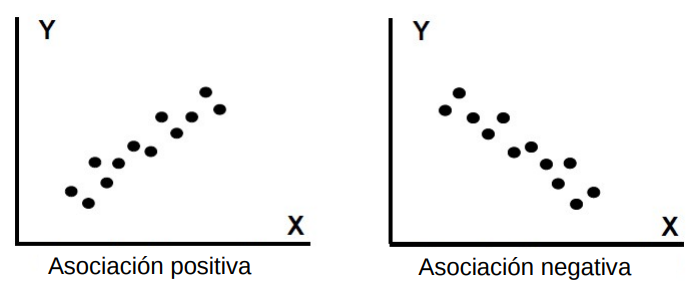



![Regresión Lineal](https://live.staticflickr.com/65535/48051791826_8d9e4844f1_b.jpg)

[Regresión lineal simple](https://aprendeia.com/algoritmo-regresion-lineal-simple-machine-learning/)

y – es la variable dependiente o la variable a predecir.
x – es la variable independiente o la variable que usamos para hacer una predicción.
a – es la pendiente o el valor que debe ser determinado, se le conoce como coeficiente y es una especie de magnitud de cambio que pasa por y cuando x cambia.

b – es la constante que debe ser determinada, se le conoce como intercepto porque cuando x es igual a 0, entonces y = b.

Lo que se busca con este algoritmo de Marchin Learning Supervisado, es que se llegue a encontrar un "recta" (modelo) que será la recta "optima" de predicción. Esto minimizando la distancia entre los puntos y la linea. (Regresión Lineal Simple – Teoría, s. f.)

![](https://live.staticflickr.com/65535/48051877172_f2e619a252_b.jpg)

[Regresión lineal simple](https://aprendeia.com/algoritmo-regresion-lineal-simple-machine-learning/)


El error es una parte inevitable del proceso de predicción, no importa cuán poderoso sea el algoritmo que elijamos, siempre habrá un error irreductible. Sabemos que no podemos eliminar por completo el error, pero aún podemos intentar reducirlo al nivel más bajo. Justamente es en este momento en que se usa la técnica conocida como mínimos cuadrados.Regresión Lineal Simple – Teoría, s. f.)

La técnica de mínimos cuadrado intenta reducir la suma de los errores al cuadrado, buscando el mejor valor posible de los coeficientes de regresión.

# Ejercicio práctico

Para este ejercicio utilizaremos la regresión lineal que nos ofrese la libreria Sklearn 

### Acceso a archivo de google drive


In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

nameFile = "Advertising.csv"
path = 'gdrive/MyDrive/Colab Scripts/archivos/Advertising'


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 1. Import librerias
---

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 2. Entedimiento del dataset

---
Este set de datos contiene información sobre las inversiones en publicidad que realizan diferente almacenes y sus ventas en las distintas ciudades. La inversión es cálculo que realizan las tiendas a los medios de comucación

**Cada fila es una tienda**
<br>
TV: Inversión en TV en euros 
<br>
Radios: Inversión en radio euros
<br>
Periódico: inversión en periódicos en euros
<br>
Ventas: el dinero ganado en cada tienda en un mes.
<br>
Tamaño de la ciudad: si la ciudad tiene una población mayor a 500.000 es grande si no es pequeña



In [9]:
fremAd = pd.read_csv(f"{path}/{nameFile}")
fremAd.drop(columns='Unnamed: 0', inplace=True)
fremAd['Sales'] = fremAd['Sales'] * 100
fremAd

,TV,Radio,Newspaper,Sales,City_size
0,230.1,37.8,69.2,2210.0,big
1,44.5,39.3,45.1,1040.0,small
2,17.2,45.9,69.3,930.0,small
3,151.5,41.3,58.5,1850.0,big
4,180.8,10.8,58.4,1290.0,small
...,...,...,...,...,...
195,38.2,3.7,13.8,760.0,small
196,94.2,4.9,8.1,970.0,small
197,177.0,9.3,6.4,1280.0,small
198,283.6,42.0,66.2,2550.0,big


## 3. Preparación de los datos

In [37]:
train, test = train_test_split(fremAd)
X_train = train.drop(columns=['Sales', 'City_size'])
y_train = train['Sales']
X_test = test.drop(columns=['Sales', 'City_size'])
y_test = test['Sales']

# 4. Entrenamiento del modelo

En primer lugar vamos a ver los hiperparámetros que tiene la Regresión lineala


1.   fit_intercept: Verdadero o Falso si desea un $ \beta $ (b) constante
2.   normalize: Si queremso que la data se normalice antes del entrenamiento

In [23]:
#Parametrizamos el modelo de regresion lineal
linReg = LinearRegression(fit_intercept=True, normalize=True)
#Entrenamiento del modelo
linReg.fit(X_train, y_train)

predict_train = linReg.predict(X_train)
predict_test = linReg.predict(X_test)


print("Mean absolute error in train: ", mean_absolute_error(predict_train, y_train))
print("Root of mean square error in train: ", np.sqrt(mean_squared_error(predict_train, y_train)))
print("Mean absolute error in test: ", mean_absolute_error(predict_test, y_test))
print("Root of mean square error in test: ", np.sqrt(mean_squared_error(predict_test, y_test)))
print("R2 in train: ", r2_score(predict_train, y_train))
print("R2 in test: ", r2_score(predict_test, y_test))
print("Min sales: ", np.min(fremAd['Sales']))
print("Max sales: ", np.max(fremAd['Sales']))


Mean absolute error in train:  128.77289619887242
Root of mean square error in train:  171.49506635904
Mean absolute error in test:  116.24061378432427
Root of mean square error in test:  153.81579043206202
R2 in train:  0.8841955079115368
R2 in test:  0.8895289348448459
Min sales:  160.0
Max sales:  2700.0




*   En promedió tienemos un error de 116 € en pruebas, lo cual no es tan malo.
*   Con respecto al error cuatratico R2, podemos decir que podemos llegar a explicar o predecir el 87% de las ventas en los distintos almacenes.

# 5. Interpretar el modelo 



In [24]:
pd.DataFrame(linReg.coef_, X_train.columns, columns=["Coefficient"])

,Coefficient
TV,4.678359
Radio,18.430736
Newspaper,-0.241912


Con estos resultados podemos ver como funciona la publicidad en las ventas:


1.   Por cada euro que invertimos en Televisión suben 4.6€ las ventas.
2.   Por cada euro que invertimos en radio, suben 18,6€ las ventas.
3.   Por cada euro que invertimos en prensa, no aumentamos en ganancias. 

En conclusión del presupuesto que tengamos de inversión publicitaria, la radio es el medio que más influye en nuestras ventas, y por tanto el más relevante para la empresa.

El *linReg.intercept_* nos dice cuál es el mínimo que ganaré, por ejemplo si mi inversión es cero en todos los medios de comunicación la empresa ganará:

In [26]:
linReg.intercept_

294.64604654412256

In [27]:
preds = pd.DataFrame({'real_values':y_test, 'predictions':predict_test})
preds

,real_values,predictions
84,2170.0,2077.820802
66,950.0,894.878272
26,1500.0,1500.156077
40,1660.0,1645.374814
45,1490.0,1520.898107
77,1420.0,1380.229181
160,1440.0,1427.832662
73,1100.0,997.509099
14,1900.0,1844.742463
58,2380.0,2185.888636


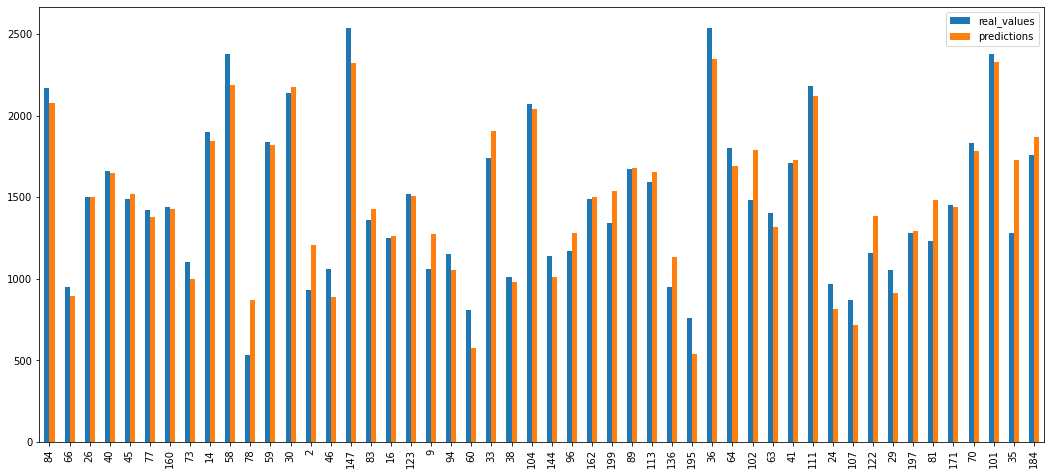

In [28]:
preds.plot(kind='bar',figsize=(18,8))
plt.grid(linewidth='2')
plt.grid(linewidth='2')
plt.grid(None)
plt.show()

## Referencias
Regresión lineal. (s. f.). Wikipedia. Recuperado 22 de marzo de 2021, de https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal#:~:text=La%20primera%20forma%20de%20regresi%C3%B3n,del%20teorema%20de%20Gauss%2DM%C3%A1rkov.

Regresión Lineal Simple – Teoría. (s. f.). Aprende IA. Recuperado 22 de marzo de 2021, de https://aprendeia.com/algoritmo-regresion-lineal-simple-machine-learning/
